#**Технологии кластерного анализа данных**

# **1. Подготовка исходных данных**

Прочитать файл с исходными данными и записать его в таблицу.

In [118]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px

df = pd.read_csv("18.csv", header = None)
df.head()

,0,1,2
0,-4.207581,-8.139759,-8.125954
1,-5.203096,-1.803540,1.819432
2,5.267896,3.429235,-2.068298
3,8.521213,5.154179,-2.430174
4,5.620354,6.591421,-2.980595


Построить диаграмму рассеяния.

In [119]:
a = px.scatter_3d(df, x = 0, y = 1, z = 2)
a.show()

Произвести масштабирование значений признаков.

In [120]:
from sklearn.preprocessing import MinMaxScaler


df_m = pd.DataFrame(MinMaxScaler().fit(df).transform(df), columns = df.columns)
print(df_m.head())
b = px.scatter_3d(df_m, x = 0, y = 1, z = 2)
print(b.show())

          0         1         2
0  0.296754  0.207447  0.177936
1  0.259255  0.473609  0.590920
2  0.653683  0.693420  0.429481
3  0.776231  0.765879  0.414454
4  0.666960  0.826252  0.391598


None


# **2. Кластеризация с использованием алгоритма k_средних**

Для выполнения заданий использовать библиотеки `sklearn` и `yellowbrick`.

Определить количество кластеров с использованием методов локтя и силуэта.


Количество кластеров: 1 инерция: 46.775796721002735
Количество кластеров: 2 инерция: 29.894286780359558
Количество кластеров: 3 инерция: 14.20964434679176
Количество кластеров: 4 инерция: 8.279174164726312
Количество кластеров: 5 инерция: 6.626880737326629
Количество кластеров: 6 инерция: 5.2684640057829855
Количество кластеров: 7 инерция: 4.902400974132433
Количество кластеров: 8 инерция: 4.663216313375613
Количество кластеров: 9 инерция: 4.423776254594878


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

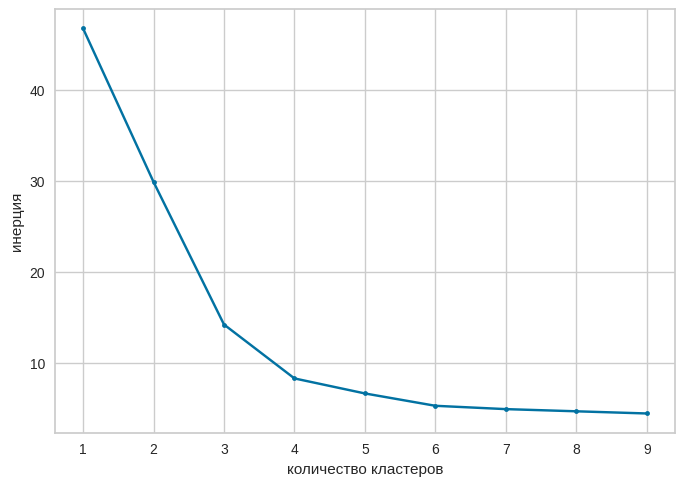

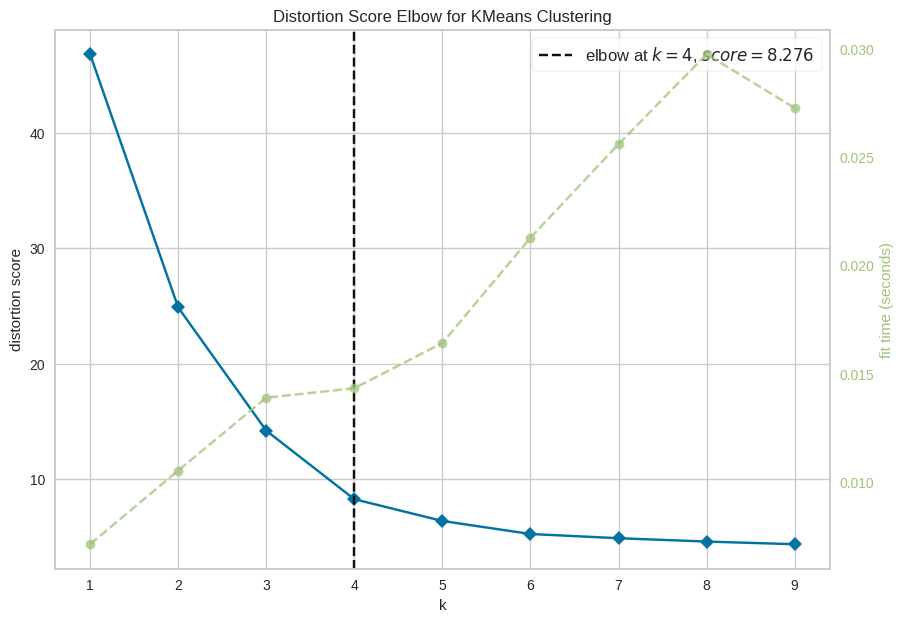

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [121]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

wcss = []
for j in range (1, 10):
  kmeans = (KMeans(n_clusters = j, init = 'k-means++', n_init = 'auto', max_iter = 300, random_state = 42))
  kmeans.fit(df_m)
  wcss.append(kmeans.inertia_)
  print(f"Количество кластеров: {j} инерция: {wcss[j-1]}")

plt.plot(wcss, marker = '.')
plt.xlabel('количество кластеров')
plt.ylabel('инерция')
plt.xticks(np.arange(0, 9), np.arange(1, 10))
plt.grid(True)

kmeans2 = (KMeans(random_state = 42))
plt.figure(figsize=(10,7))
visualizer = KElbowVisualizer(kmeans2, k =(1, 10))
visualizer.fit(df_m)
visualizer.show()

Количество кластеров = 2, средний коэффициент силуета = 0.4602231246790628
Количество кластеров = 3, средний коэффициент силуета = 0.4795763515218106
Количество кластеров = 4, средний коэффициент силуета = 0.539708135229521
Количество кластеров = 5, средний коэффициент силуета = 0.4579216603086227
Количество кластеров = 6, средний коэффициент силуета = 0.44941110733917794
Количество кластеров = 7, средний коэффициент силуета = 0.4274968467660606
Количество кластеров = 8, средний коэффициент силуета = 0.3532772395543668
Количество кластеров = 9, средний коэффициент силуета = 0.3264157474207633


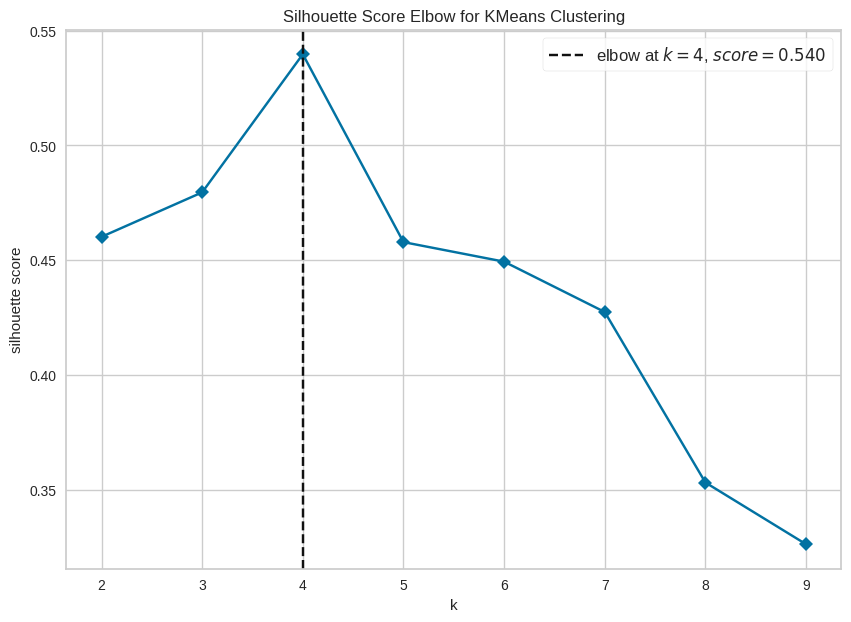

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [122]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

for j in range (2, 10):
  silhouette_avg = silhouette_score(df_m,  KMeans(n_clusters = j, init = 'k-means++', n_init = 'auto', random_state = 0).fit(df_m).labels_)
  print(f"Количество кластеров = {j}, средний коэффициент силуета = {silhouette_avg}")

plt.figure(figsize = (10, 7))
visualizer = KElbowVisualizer(KMeans(n_clusters = j, init = 'k-means++', n_init = 'auto', random_state = 0), k =(2, 10), metric = 'silhouette', timings = False)
visualizer.fit(df_m)
visualizer.show()

Обучить модель кластеризации.

In [123]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', algorithm = 'lloyd', n_init = 10, random_state = 42)
kmeans.fit(df_m)

KMeans(n_clusters=4, n_init=10, random_state=42)

Построить таблицу с исходными значениями признаков и номерами кластеров для каждого объекта.

In [124]:
dfc_m = df_m.copy()
dfc_m['Кластер'] = kmeans.labels_


dfc = df.copy()
dfc['Кластер'] = kmeans.labels_
dfc.head()

,0,1,2,Кластер
0,-4.207581,-8.139759,-8.125954,0
1,-5.203096,-1.803540,1.819432,3
2,5.267896,3.429235,-2.068298,1
3,8.521213,5.154179,-2.430174,1
4,5.620354,6.591421,-2.980595,1


Построить диаграмму рассеяния и отобразить цветами полученные кластеры.

In [102]:
ab = px.scatter_3d(dfc, x = 0, y = 1, z = 2, color = 'Кластер')
ab.show()

Описать полученные кластеры:
- построить таблицу, содержащую средние значения признаков в каждом кластере;
- построить диаграммы boxplot для всех признаков, разделенных по кластерам.


In [125]:
a = dfc_m.groupby(['Кластер']).mean()
a

,0,1,2
Кластер,,,
0,0.278372,0.169775,0.204948
1,0.664766,0.696208,0.413249
2,0.745173,0.418191,0.777065
3,0.166166,0.566693,0.463957


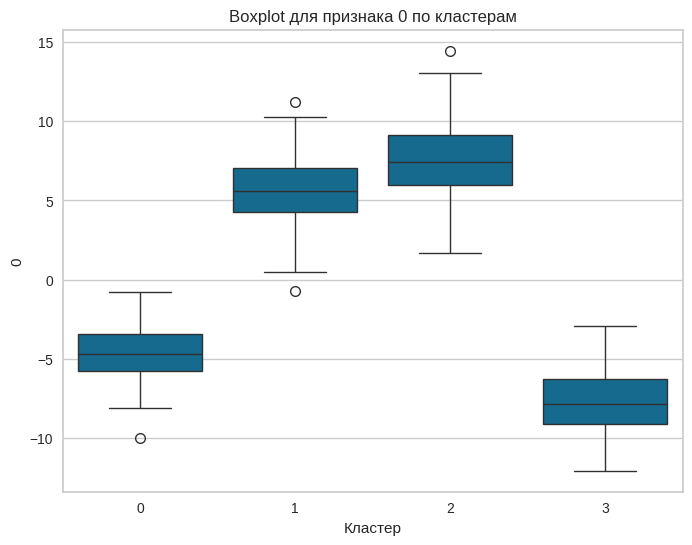

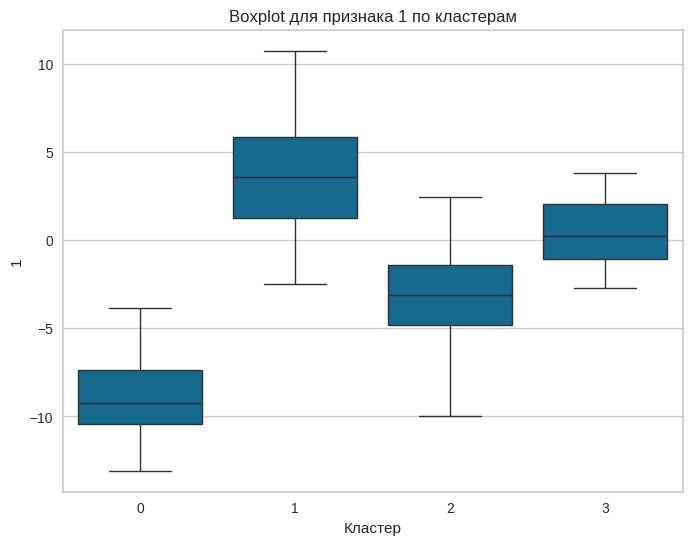

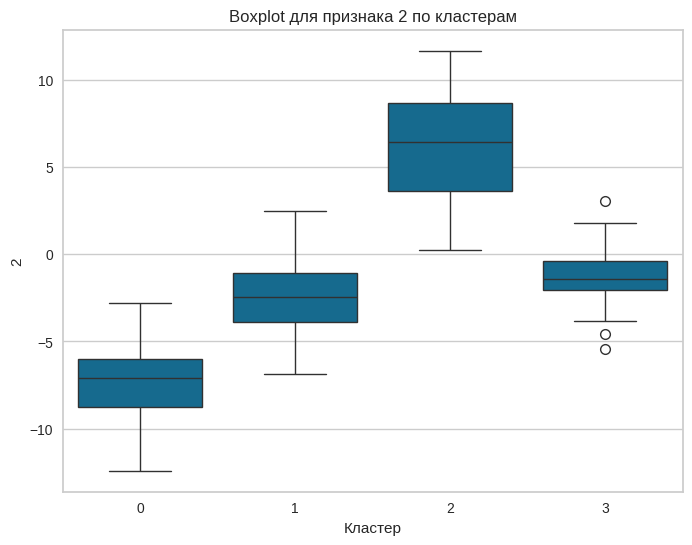

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in dfc.columns[:-1]:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Кластер', y=column, data=dfc)
    plt.title(f'Boxplot для признака {column} по кластерам')
    plt.show()

# **3. Кластеризация с использованием иерархического агломеративного алгоритма**

Для выполнения заданий использовать библиотеки `scipy` и `yellowbrick`.

Построить и вывести матрицу связностей (расстояний).


         1      2  Расстояние  Количество обьектов
Шаг                                               
0    168.0  278.0    0.134863                  2.0
1    103.0  183.0    0.134934                  2.0
2    170.0  243.0    0.197094                  2.0
3    112.0  185.0    0.199182                  2.0
4      9.0  295.0    0.252587                  2.0
..     ...    ...         ...                  ...
294  589.0  593.0   36.661088                103.0
295  588.0  591.0   48.322850                 97.0
296  590.0  592.0   82.783030                100.0
297  594.0  595.0  110.450038                200.0
298  596.0  597.0  170.667261                300.0

[299 rows x 4 columns]


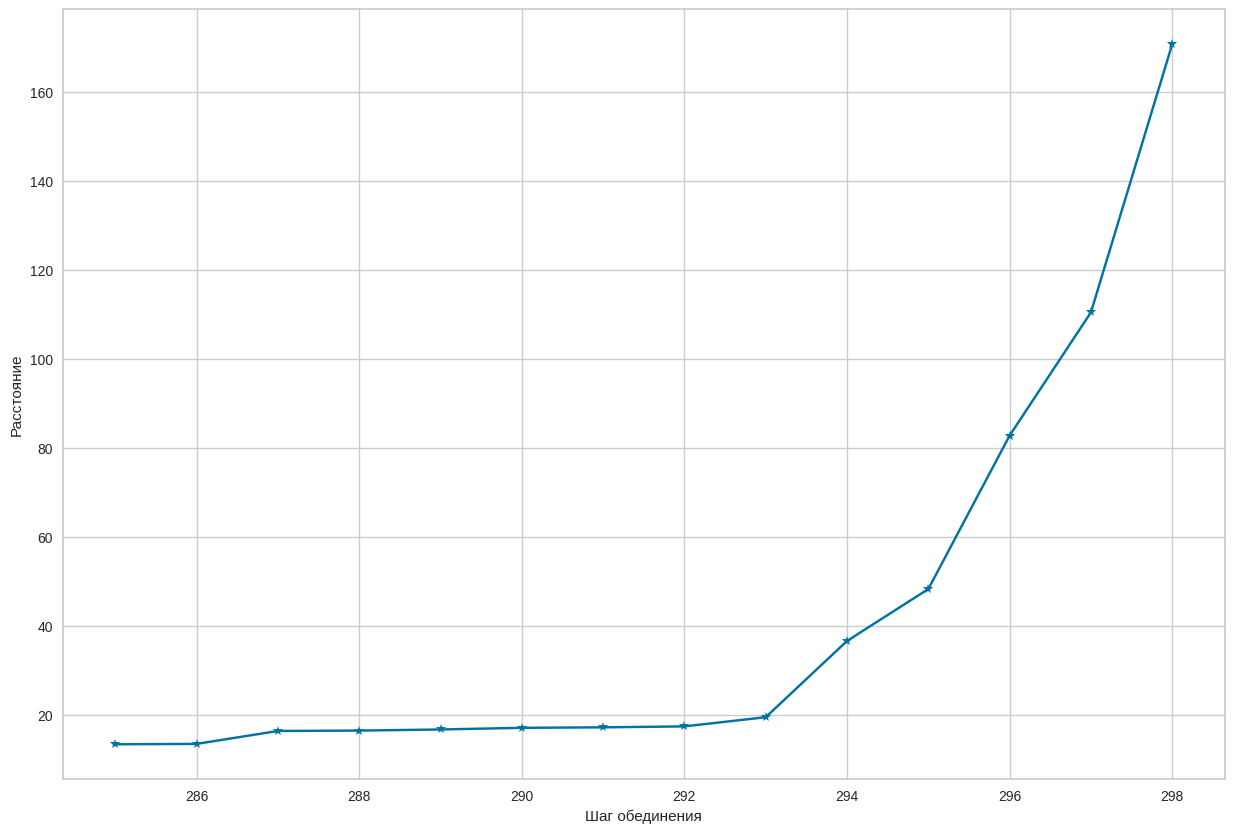

In [167]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Z = linkage(df, 'ward')
dfc1 = pd.DataFrame(Z, columns  = [1,2,'Расстояние', 'Количество обьектов'])
dfc1.index.rename('Шаг', inplace = True)
print(dfc1)

filtered_dfc1 = dfc1.loc[285:]
idxs = range (0, len(dfc1))
plt.figure(figsize = (15, 10))
plt.plot(filtered_dfc1.index, filtered_dfc1['Расстояние'], marker = '*')
plt.xlabel('Шаг обединения')
plt.ylabel('Расстояние')
plt.grid(True)
plt.show()

Построить дендрограмму (отключить раскраску кластеров различными цветами).

На ее основе определить количество кластеров и пороговое значение расстояния.


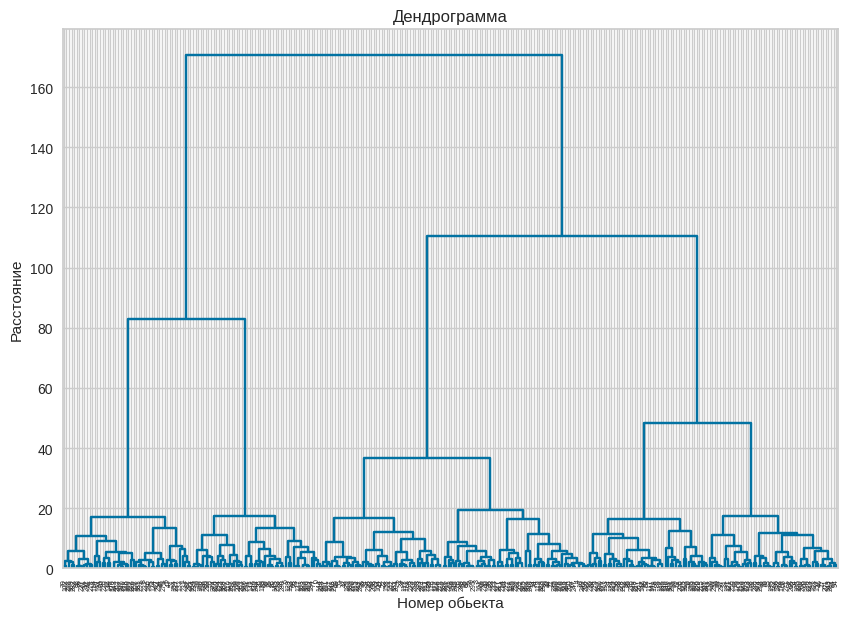

In [159]:
plt.figure(figsize = (10,7))

plt.title('Дендрограмма')
plt.xlabel('Номер обьекта')
plt.ylabel('Расстояние')
dendrogram(Z, color_threshold=-1)
plt.show()

Построить дендрограмму с выбранным пороговым значением расстояния.


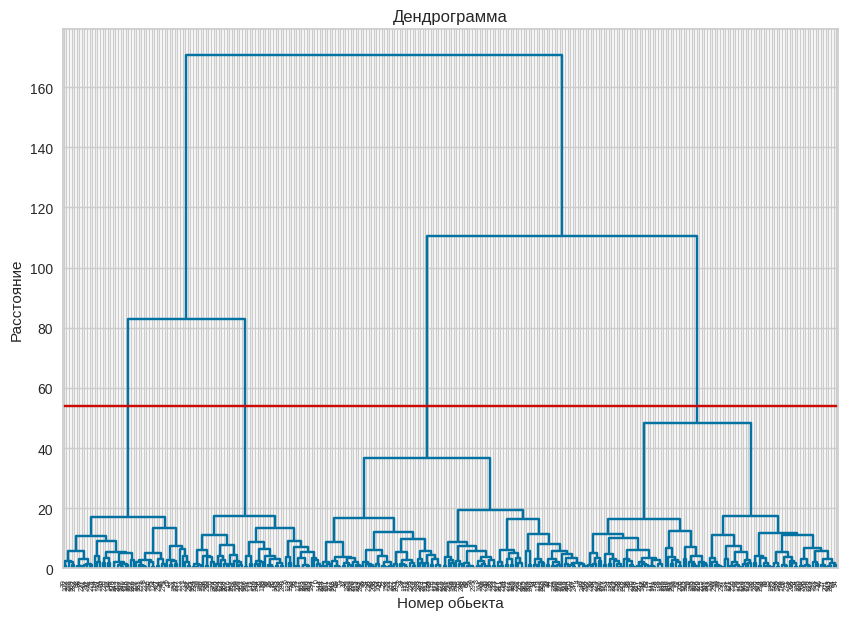

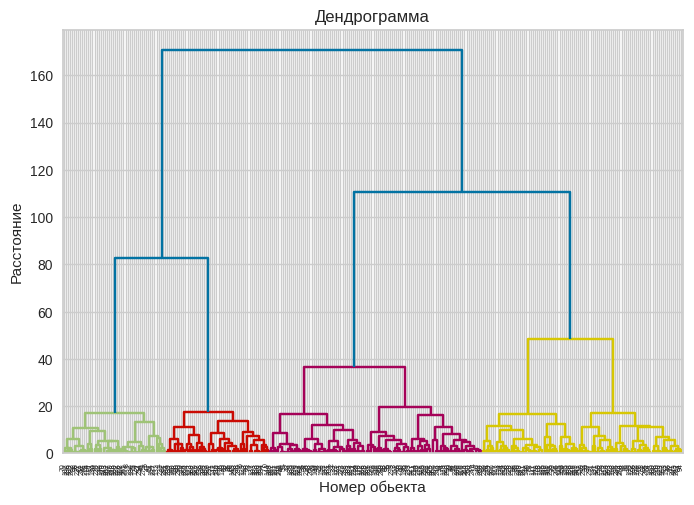

In [169]:
plt.figure(figsize = (10,7))

plt.title('Дендрограмма')
plt.xlabel('Номер обьекта')
plt.ylabel('Расстояние')
dendrogram(Z, color_threshold=-1)
plt.hlines(54, 0, 10000, color = 'r')
plt.show()

plt.title('Дендрограмма')
plt.xlabel('Номер обьекта')
plt.ylabel('Расстояние')
dendrogram(Z, color_threshold=54)

plt.show()

Построить таблицу с исходными значениями признаков и номерами кластеров для каждого объекта.

In [171]:
df4 = df.copy()
df4['Кластер'] = fcluster(Z, 4, criterion='maxclust')
df4.head()

,0,1,2,Кластер
0,-4.207581,-8.139759,-8.125954,2
1,-5.203096,-1.803540,1.819432,1
2,5.267896,3.429235,-2.068298,3
3,8.521213,5.154179,-2.430174,3
4,5.620354,6.591421,-2.980595,3


Построить диаграмму рассеяния и отобразить цветами полученные кластеры.

In [173]:
fig = px.scatter_3d(df4, x = 0, y = 1, z = 2, color = 'Кластер')
fig.show()

Описать полученные кластеры:
- построить таблицу, содержащую средние значения признаков в каждом кластере;
- построить диаграммы boxplot для всех признаков, раздеденных по кластерам.


In [174]:
b = df4.groupby(['Кластер']).median()
b

,0,1,2
Кластер,,,
1,-7.854249,0.243454,-1.400455
2,-4.702111,-9.261974,-7.115859
3,5.620354,3.725706,-2.757083
4,7.371969,-2.626028,6.202231


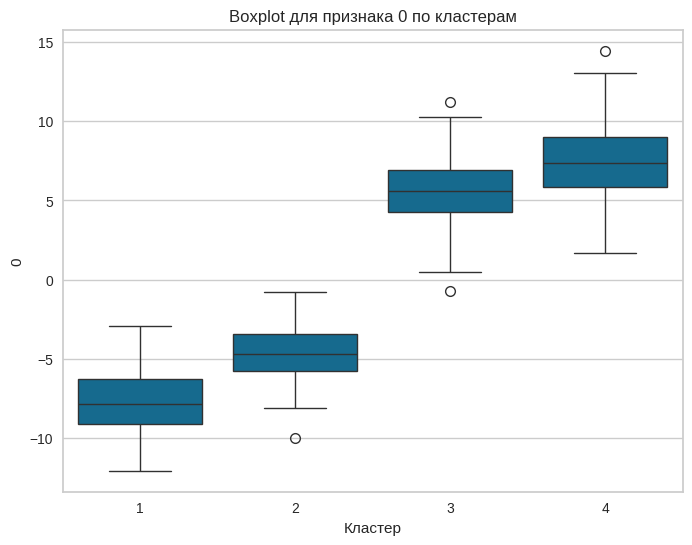

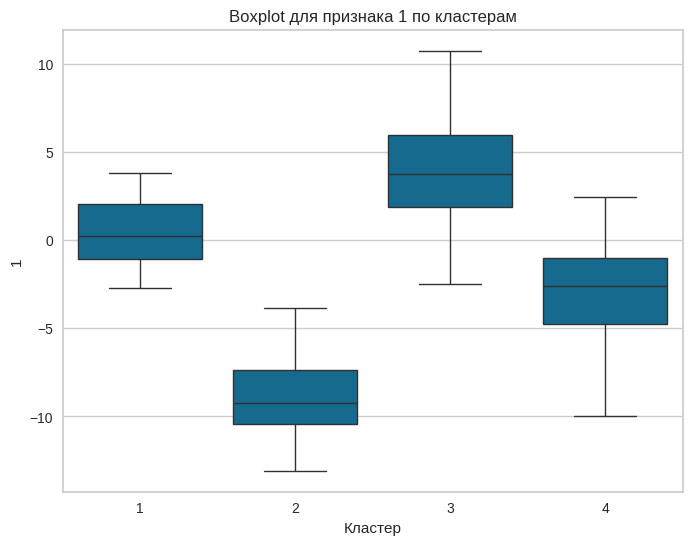

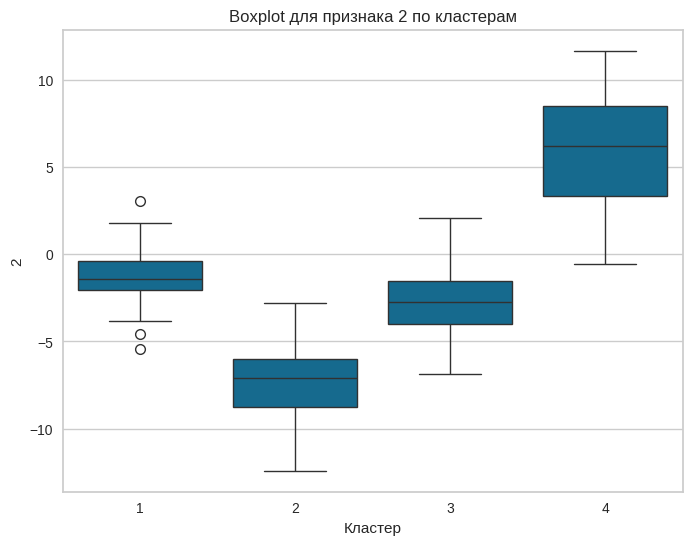

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in df4.columns[:-1]:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Кластер', y=column, data=df4)
    plt.title(f'Boxplot для признака {column} по кластерам')
    plt.show()